# Projet 4 - Anticipez les besoins en consommation de bâtiments

# Exploration des données

## 1/ Chargement des packages

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2/ Chargement du dataframe

In [54]:
data = pd.read_csv('C:/Users/raflg/Downloads/OpenClassrooms/Projet 4/2016_Building_Energy_Benchmarking.csv')
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [55]:
data.shape

(3376, 46)

In [56]:
#Suppression des batiments à but d'habitation
data['BuildingType'].unique()
data = data[~data['BuildingType'].str.contains('family')].reset_index(drop=True).copy()

In [57]:
data.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,1668.000000,1668.0,1652.000000,1668.000000,1668.000000,1668.000000,1668.000000,1666.000000,1668.000000,1.668000e+03,...,1.666000e+03,1.665000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,0.0,1666.000000,1666.000000
mean,16336.346523,2016.0,98116.819613,4.356715,47.616054,-122.332908,1961.913669,1.168667,4.121103,1.188427e+05,...,8.437933e+06,8.064790e+06,5.125726e+05,1.712630e+06,5.843493e+06,1.970845e+04,1.970845e+06,NaN,184.973301,1.607845
std,13835.292512,0.0,18.430353,2.191048,0.048168,0.024580,32.741755,2.931409,6.563407,2.973622e+05,...,3.024380e+07,2.203878e+07,5.513944e+06,6.095172e+06,2.079673e+07,9.370814e+04,9.370814e+06,NaN,751.976001,2.336882
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.411820,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,582.750000,2016.0,98105.000000,2.000000,47.585458,-122.343280,1930.000000,1.000000,1.000000,2.947775e+04,...,1.229291e+06,1.294615e+06,0.000000e+00,2.114083e+05,7.213255e+05,0.000000e+00,0.000000e+00,NaN,19.967500,0.350000
50%,21143.500000,2016.0,98109.000000,4.000000,47.612340,-122.332935,1965.000000,1.000000,2.000000,4.928950e+04,...,2.554947e+06,2.685146e+06,0.000000e+00,4.724153e+05,1.611881e+06,4.982630e+03,4.982630e+05,NaN,49.580000,0.880000
75%,24602.250000,2016.0,98125.000000,7.000000,47.649675,-122.321675,1989.000000,1.000000,4.000000,1.053250e+05,...,6.913348e+06,7.109712e+06,0.000000e+00,1.420747e+06,4.847589e+06,1.520000e+04,1.520000e+06,NaN,142.382500,1.890000
max,50226.000000,2016.0,98199.000000,7.000000,47.733870,-122.258640,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [58]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

- Les variables à prédire sont 'TotalGHGEmissions' et 'SiteEnergyUse(kBtu)'

## 3/ Analyse du jeu de données

- Supprimons les lignes sont informations sur les consommations (colonnes numériques)

In [59]:
#Calcul du taux de données manquantes sur les indicateurs numériques
data['%_NaN'] = data[['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                      'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 
                      'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 
                       'GHGEmissionsIntensity']].isna().mean(axis=1)

In [60]:
#Suppression des lignes sans information sur les indicateurs numériques
data['%_NaN'].unique()
data = data[data['%_NaN']!=1]

- Analysons les types de colonnes et les valeurs manquantes

In [61]:
#Type des colonnes
print(data.dtypes)
print('')
print(data.dtypes.value_counts())

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [62]:
#Taux de valeurs manquantes des colonnes
data.isna().mean()

OSEBuildingID                      0.000000
DataYear                           0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
PropertyName                       0.000000
Address                            0.000000
City                               0.000000
State                              0.000000
ZipCode                            0.009604
TaxParcelIdentificationNumber      0.000000
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
Latitude                           0.000000
Longitude                          0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.000000
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
ListOfAllPropertyUseTypes          0.000000
LargestPropertyUseType             0.002401
LargestPropertyUseTypeGFA       

In [63]:
#Suppression des colonnes avec trop de données manquantes (données semblants peu pertinentes)
nan_cols = data.isna().mean()
nan_cols_idx = nan_cols[nan_cols > 0.45].index.tolist()
data[nan_cols_idx]

,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,Comments,Outlier
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Parking,15064.0,Restaurant,4622.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Parking,68009.0,Swimming Pool,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1665,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,NaN,NaN
1666,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,NaN,NaN,NaN


In [64]:
data = data.drop(columns=nan_cols_idx)

- Traitons les colonnes textuelles

In [65]:
data['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office'], dtype=object)

In [66]:
#Suppression des bâtiments à but d'habitation
data = data[data['PrimaryPropertyType']!='Low-Rise Multifamily']

In [67]:
#Réattribution du type de bâtiment
data.loc[data['PropertyName'].str.contains('Museum'), 'BuildingType'] = 'NonResidential'
data.loc[data['PrimaryPropertyType'].str.contains('School'), 'BuildingType'] = 'SPS-District K-12'

In [68]:
data['Neighborhood'] = data['Neighborhood'].str.upper()

In [69]:
data['ListOfAllPropertyUseTypes'].fillna('unknown', inplace=True)

In [70]:
data[['PropertyName', 'PrimaryPropertyType', 'ListOfAllPropertyUseTypes',
      'LargestPropertyUseType']][data['LargestPropertyUseType'].isna()]

,PropertyName,PrimaryPropertyType,ListOfAllPropertyUseTypes,LargestPropertyUseType
347,Market St Center,Self-Storage Facility,"Fitness Center/Health Club/Gym, Office, Other ...",NaN
821,Palladian Hotel,Hotel,Hotel,NaN
1350,Talon Northlake LLC,Small- and Mid-Sized Office,Office,NaN
1368,BUSH GARDEN - RESTURANT & LOUNGE,Restaurant,Restaurant,NaN


In [71]:
data.loc[347, 'LargestPropertyUseType'] = 'Fitness Center/Health Club/Gym'
data.loc[821, 'LargestPropertyUseType'] = 'Hotel'
data.loc[1350, 'LargestPropertyUseType'] = 'Office'
data.loc[1368, 'LargestPropertyUseType'] = 'Restaurant'

In [72]:
#Suppression des bâtiments à but d'habitation
data['LargestPropertyUseType'].unique()
data = data[data['LargestPropertyUseType']!='Multifamily Housing'].copy()

In [73]:
#Création d'une colonne sur l'utilisation première des bâtiments selon la liste de tous les usages des bâtiments
data['FirstPropertyUse'] = data['ListOfAllPropertyUseTypes'].str.split(',').str[0]

In [74]:
#Création d'une macro catégorie de 'PrimaryPropertyType'
data['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Office'], dtype=object)

In [75]:
#Création d'une macro catégorie du type d'usage premier des bâtiments
primary_type = [(data['PrimaryPropertyType']=='Small- and Mid-Sized Office') | 
                (data['PrimaryPropertyType']=='Large Office') | (data['PrimaryPropertyType']=='Office'),
                (data['PrimaryPropertyType']=='Medical Office') | (data['PrimaryPropertyType']=='Laboratory') |
                (data['PrimaryPropertyType']=='Hospital') | (data['PrimaryPropertyType']=='Senior Care Community'),
                (data['PrimaryPropertyType']=='Residence Hall') | (data['PrimaryPropertyType']=='University') |
                (data['PrimaryPropertyType']=='K-12 School'),
                (data['PrimaryPropertyType']=='Retail Store') | (data['PrimaryPropertyType']=='Supermarket / Grocery Store'),
                (data['PrimaryPropertyType']=='Self-Storage Facility') | (data['PrimaryPropertyType']=='Warehouse') |
                (data['PrimaryPropertyType']=='Refrigerated Warehouse') |
                (data['PrimaryPropertyType']=='Distribution Center'),
                (data['PrimaryPropertyType']=='Hotel'),
                (data['PrimaryPropertyType']=='Other'),
                (data['PrimaryPropertyType']=='Mixed Use Property'),
                (data['PrimaryPropertyType']=='Restaurant'),
                (data['PrimaryPropertyType']=='Worship Facility')]

macro_type = ['Office', 'Medical', 'Education', 'Store', 'Storage', 'Hotel', 'Other', 'Mixed Use Property', 'Restaurant',
              'Worship Facility']

data['MacroPrimaryType'] = np.select(primary_type, macro_type)

In [76]:
#Suppression des lignes sans ENERGYSTARScore et données manquantes sur les colonnes utiles pour la modélisation
data = data[data['ENERGYSTARScore'].notna()]
data = data[data['LargestPropertyUseTypeGFA'].notna()]
data = data.reset_index(drop=True)

 - Analysons plus en détails les types de colonnes

In [77]:
#Identification des colonnes catégorielles
cat_cols = [col for col in data.columns if data[col].dtypes=='object']
cat_cols

['BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'TaxParcelIdentificationNumber',
 'Neighborhood',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'ComplianceStatus',
 'FirstPropertyUse',
 'MacroPrimaryType']

In [78]:
#Regardons les valeurs uniques que prennent chaque colonne catégorielle
data[cat_cols].nunique()

BuildingType                        4
PrimaryPropertyType                17
PropertyName                     1087
Address                          1077
City                                1
State                               1
TaxParcelIdentificationNumber    1042
Neighborhood                       13
ListOfAllPropertyUseTypes         157
LargestPropertyUseType             20
ComplianceStatus                    3
FirstPropertyUse                   34
MacroPrimaryType                    9
dtype: int64

In [79]:
#Identification des colonnes numériques
num_cols = [col for col in data.columns if data[col].dtypes!='object' and data[col].dtypes!='bool']
num_cols

['OSEBuildingID',
 'DataYear',
 'ZipCode',
 'CouncilDistrictCode',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 '%_NaN']

In [80]:
data[num_cols].describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,%_NaN
count,1088.000000,1088.0,1085.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000,1.088000e+03,...,1.088000e+03,1.087000e+03,1.088000e+03,1.088000e+03,1.088000e+03,1.088000e+03,1.088000e+03,1088.000000,1088.000000,1088.000000
mean,14753.919118,2016.0,98116.773272,4.399816,47.615711,-122.332611,1963.473346,1.023897,4.831801,1.246330e+05,...,8.377491e+06,8.544522e+06,5.493492e+05,1.723214e+06,5.879608e+06,1.910825e+04,1.910825e+06,184.876048,1.366241,0.000141
std,13398.081278,0.0,18.095896,2.194557,0.049038,0.024706,31.743412,0.506970,7.799477,2.024049e+05,...,2.478729e+07,2.535561e+07,6.160693e+06,4.430202e+06,1.511585e+07,1.083126e+05,1.083126e+07,825.812311,1.950917,0.004664
min,1.000000,2016.0,98020.000000,1.000000,47.499170,-122.411820,1900.000000,0.000000,0.000000,1.229400e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,-0.800000,-0.020000,0.000000
25%,537.000000,2016.0,98104.000000,2.000000,47.584170,-122.343250,1938.000000,1.000000,1.000000,3.219425e+04,...,1.279006e+06,1.363144e+06,0.000000e+00,2.249673e+05,7.675888e+05,0.000000e+00,0.000000e+00,20.297500,0.330000,0.000000
50%,20501.500000,2016.0,98109.000000,4.000000,47.612300,-122.333185,1967.500000,1.000000,3.000000,5.411300e+04,...,2.657902e+06,2.792754e+06,0.000000e+00,5.176298e+05,1.766153e+06,4.420369e+03,4.420370e+05,50.025000,0.760000,0.000000
75%,24229.750000,2016.0,98122.000000,7.000000,47.650198,-122.321808,1989.000000,1.000000,5.000000,1.241388e+05,...,7.294487e+06,7.519058e+06,0.000000e+00,1.574502e+06,5.372202e+06,1.389833e+04,1.389833e+06,134.907500,1.640000,0.000000
max,50222.000000,2016.0,98199.000000,7.000000,47.733870,-122.258640,2015.000000,9.000000,99.000000,1.952220e+06,...,4.483853e+08,4.716139e+08,1.349435e+08,8.046087e+07,2.745325e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000,0.153846


## 4/ Analyse variables cibles : 'TotalGHGEmissions' et 'SiteEnergyUse(kBtu)'

- Supprimons les outliers pour la visualisation (> P99)

In [81]:
data = data[data['TotalGHGEmissions']<np.nanpercentile(data['TotalGHGEmissions'], 99)]

In [82]:
data[['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']].describe()

,TotalGHGEmissions,SiteEnergyUse(kBtu)
count,1077.000000,1.077000e+03
mean,119.051727,6.600968e+06
std,200.274918,1.286743e+07
min,-0.800000,0.000000e+00
25%,20.120000,1.269848e+06
50%,49.550000,2.615248e+06
75%,131.020000,6.962073e+06
max,1990.500000,2.746822e+08


In [83]:
data = data[data['SiteEnergyUse(kBtu)']<np.nanpercentile(data['SiteEnergyUse(kBtu)'], 99)]

In [84]:
data[['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']].describe()

,TotalGHGEmissions,SiteEnergyUse(kBtu)
count,1066.000000,1.066000e+03
mean,110.552974,5.785450e+06
std,172.293465,7.999721e+06
min,-0.800000,0.000000e+00
25%,20.082500,1.267377e+06
50%,49.120000,2.572873e+06
75%,129.150000,6.792706e+06
max,1727.110000,5.307916e+07


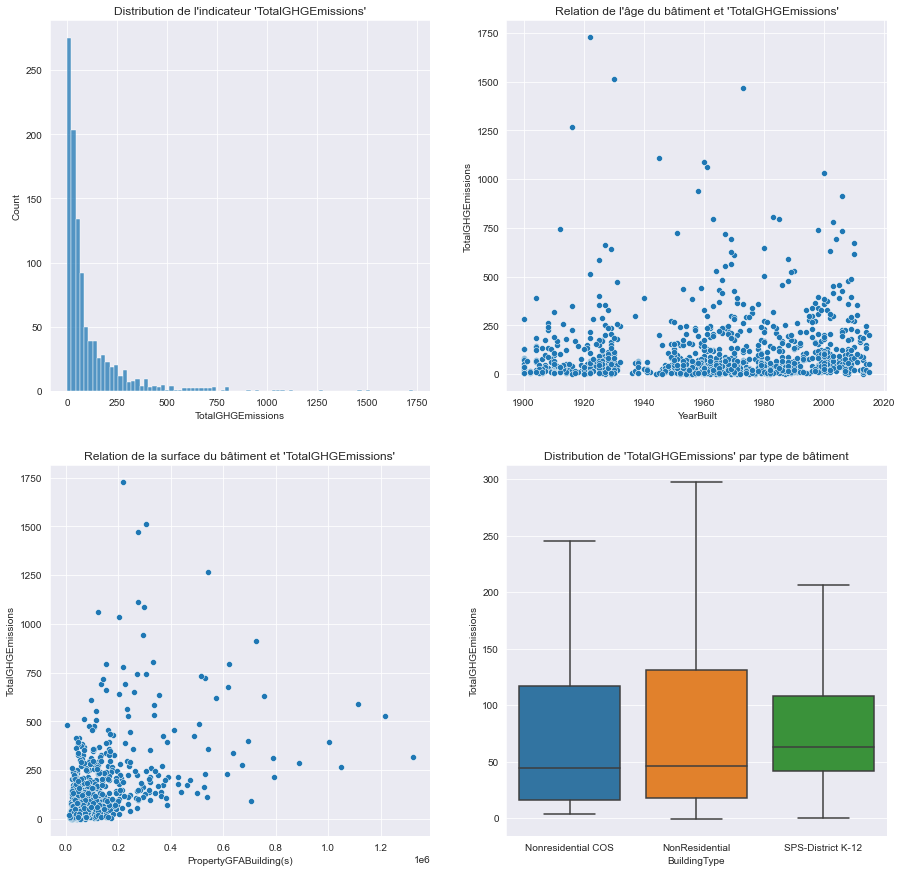

In [85]:
#Visualisation de la distribution et des relations de 'TotalGHGEmissions'
sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.histplot(ax=axes[0, 0], data=data, x='TotalGHGEmissions')
axes[0, 0].set_title("Distribution de l'indicateur 'TotalGHGEmissions'")
sns.scatterplot(ax=axes[0, 1], data=data, x='YearBuilt', y='TotalGHGEmissions')
axes[0, 1].set_title("Relation de l'âge du bâtiment et 'TotalGHGEmissions'")
sns.scatterplot(ax=axes[1, 0], data=data, x='PropertyGFABuilding(s)', y='TotalGHGEmissions')
axes[1, 0].set_title("Relation de la surface du bâtiment et 'TotalGHGEmissions'")
sns.boxplot(ax=axes[1, 1], data=data, x='BuildingType', y='TotalGHGEmissions', showfliers=False,
            order=data.groupby('BuildingType')['TotalGHGEmissions'].median().sort_values().index)
axes[1, 1].set_title("Distribution de 'TotalGHGEmissions' par type de bâtiment")
fig.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 4/sub_co2.png', bbox_inches='tight')
plt.show()

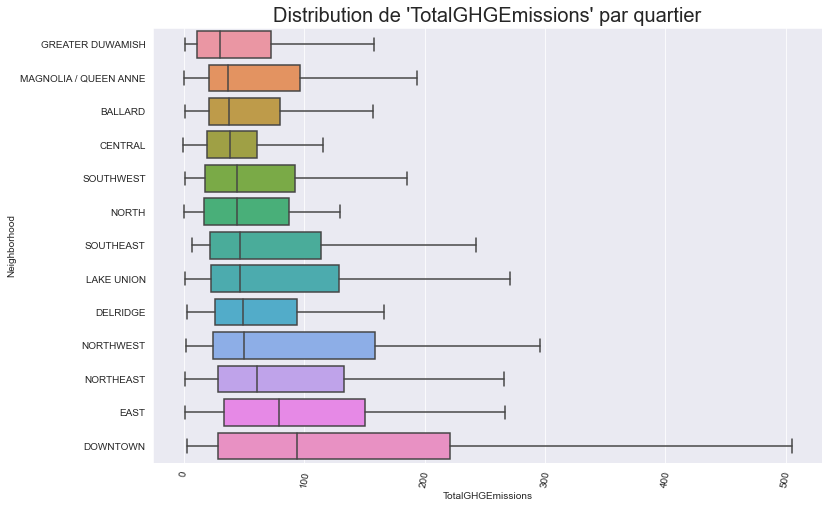

In [86]:
#Distribution de l'indicateur 'TotalGHGEmissions' par quartier
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, y='Neighborhood', x='TotalGHGEmissions',
            order=data.groupby('Neighborhood')['TotalGHGEmissions'].median().sort_values().index, orient='h',
            showfliers=False)
plt.xticks(rotation=80)
plt.title("Distribution de 'TotalGHGEmissions' par quartier", fontsize=20)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 4/box_co2.png', bbox_inches='tight')
plt.show()

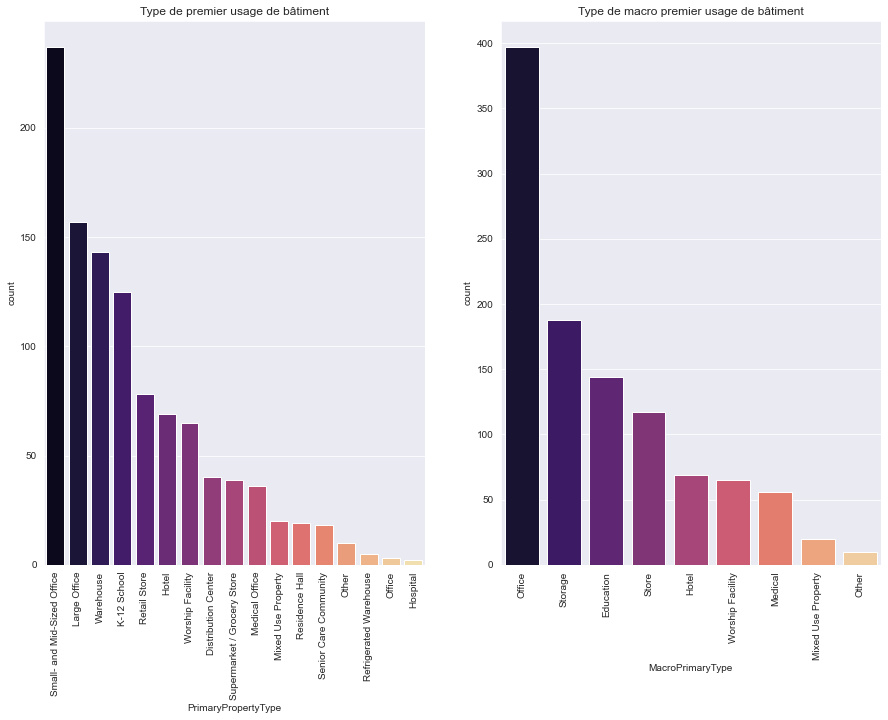

In [87]:
#Représentation des types de premier usage des bâtiments
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

sns.countplot(ax=axes[0], data=data, x='PrimaryPropertyType', 
              order=data.PrimaryPropertyType.value_counts().index, palette='magma')
axes[0].set_title('Type de premier usage de bâtiment')
sns.countplot(ax=axes[1], data=data, x='MacroPrimaryType', 
              order=data.MacroPrimaryType.value_counts().index, palette='magma')
axes[1].set_title('Type de macro premier usage de bâtiment')

axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)

fig.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 4/bar_building.png', bbox_inches='tight')
plt.show()

- On repète la même visualisation pour 'SiteEnergyUse(kBtu)'

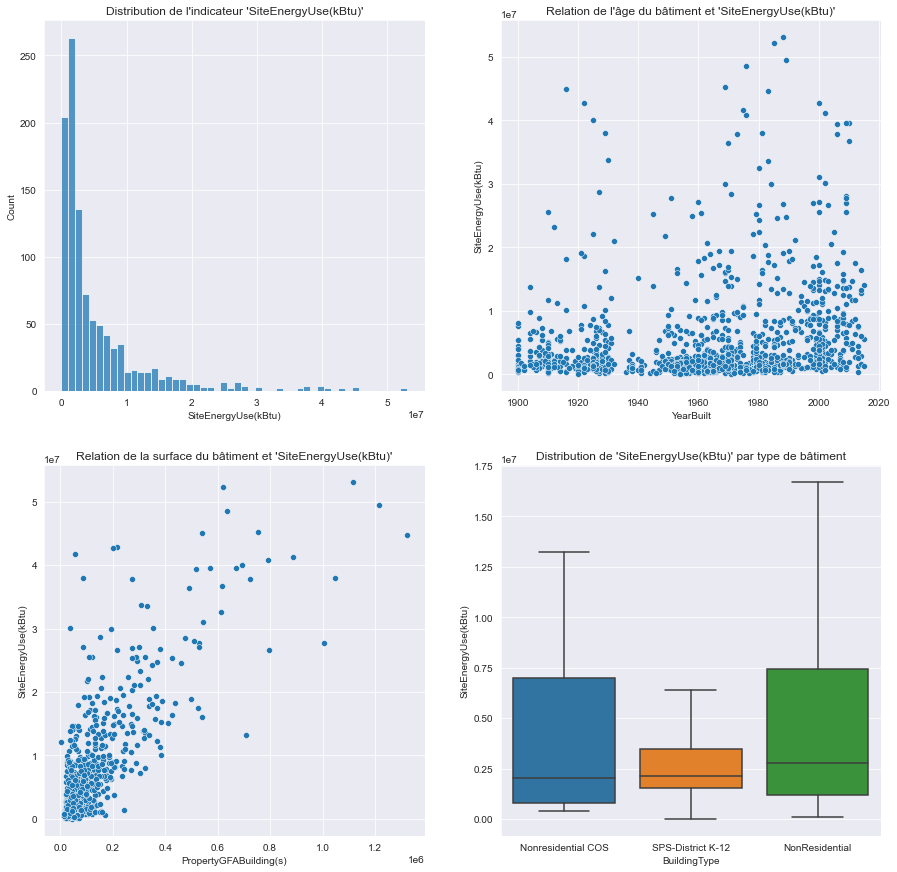

In [88]:
#Visualisation de la distribution et des relations de 'SiteEnergyUse(kBtu)'
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.histplot(ax=axes[0, 0], data=data, x='SiteEnergyUse(kBtu)')
axes[0, 0].set_title("Distribution de l'indicateur 'SiteEnergyUse(kBtu)'")
sns.scatterplot(ax=axes[0, 1], data=data, x='YearBuilt', y='SiteEnergyUse(kBtu)')
axes[0, 1].set_title("Relation de l'âge du bâtiment et 'SiteEnergyUse(kBtu)'")
sns.scatterplot(ax=axes[1, 0], data=data, x='PropertyGFABuilding(s)', y='SiteEnergyUse(kBtu)')
axes[1, 0].set_title("Relation de la surface du bâtiment et 'SiteEnergyUse(kBtu)'")
sns.boxplot(ax=axes[1, 1], data=data, x='BuildingType', y='SiteEnergyUse(kBtu)', showfliers=False,
            order=data.groupby('BuildingType')['SiteEnergyUse(kBtu)'].median().sort_values().index)
axes[1, 1].set_title("Distribution de 'SiteEnergyUse(kBtu)' par type de bâtiment")
fig.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 4/sub_energy.png', bbox_inches='tight')
plt.show()

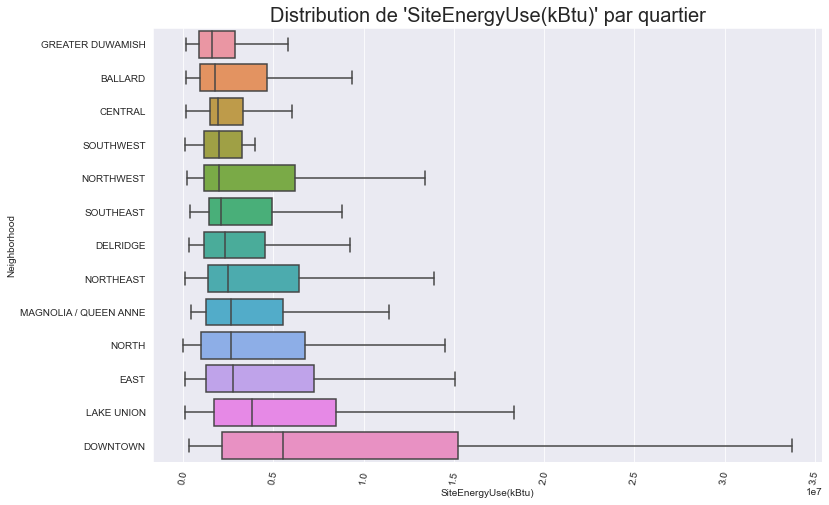

In [89]:
#Distribution de l'indicateur 'SiteEnergyUse(kBtu)' par quartier
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, y='Neighborhood', x='SiteEnergyUse(kBtu)',
            order=data.groupby('Neighborhood')['SiteEnergyUse(kBtu)'].median().sort_values().index, orient='h',
            showfliers=False)
plt.xticks(rotation=80)
plt.title("Distribution de 'SiteEnergyUse(kBtu)' par quartier", fontsize=20)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 4/box_energy.png', bbox_inches='tight')
plt.show()

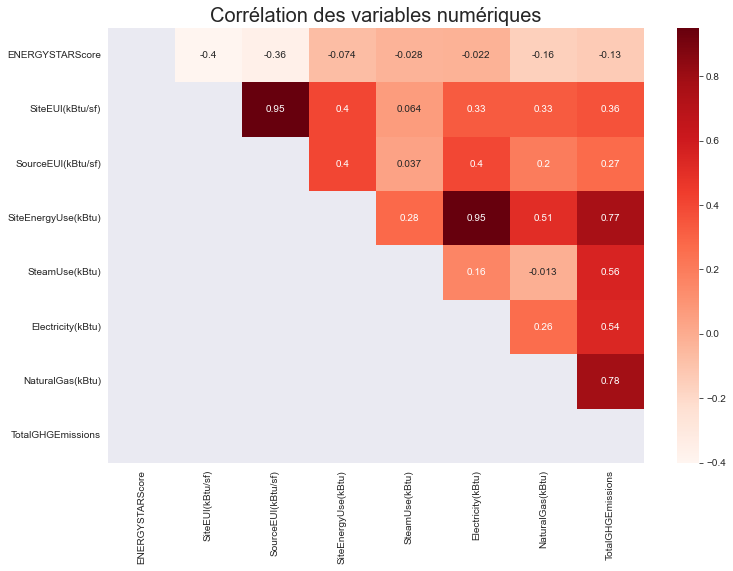

In [90]:
#Corrélation entre les indicateurs numériques
num_cols
corr_tbl = data[['ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
                 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_tbl, annot=True, cmap='Reds', mask=np.tril(np.ones_like(corr_tbl, dtype=bool)))
plt.title('Corrélation des variables numériques', fontsize=20)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 4/corr_num.png', bbox_inches='tight')

## 5/ Feature engineering

- Création de variables supplémentaires à partir des informations sur les bâtiments

In [91]:
#Création d'une variable sur le volume total des bâtiments
data['BuildingVolume'] = data['PropertyGFAParking'] + (data['NumberofFloors'] * data['PropertyGFABuilding(s)'])

In [92]:
#Création d'une variable sur le ratio en la surface du parking et celle du bâtiment
data['RatioGFAParking'] = data['PropertyGFAParking'] / data['PropertyGFATotal']

In [93]:
#Création d'une variable sur l'âge du bâtiment
data['BuildingAge'] = [2016]*data.shape[0] - data['YearBuilt'] 

In [94]:
data.shape

(1066, 45)

## 6/ Enregistrement du jeu de données

In [95]:
data.to_csv('C:/Users/raflg/Downloads/OpenClassrooms/Projet 4/2016_Building_Energy_Benchmarking_cleaned.csv', index=False)